In [5]:
import numpy as np 
import pandas as pd
import os
import tensorflow

In [7]:
input_folder = 'C:\\Users\\marat\\DM_FinalProject\\Eurosat\\EuroSAT'

In [9]:
column_names =  ["img_id", "img_path", "class_id", "class_name"]

train_df = pd.read_csv(r"C:\Users\marat\DM_FinalProject\Eurosat\EuroSAT\train.csv", names=column_names)
validation_df = pd.read_csv(r"C:\Users\marat\DM_FinalProject\Eurosat\EuroSAT\validation.csv", names=column_names)
test_df = pd.read_csv(r"C:\Users\marat\DM_FinalProject\Eurosat\EuroSAT\test.csv", names=column_names)

In [11]:
train_df.head()

,img_id,img_path,class_id,class_name
0,16257,AnnualCrop/AnnualCrop_142.jpg,0,AnnualCrop
1,3297,HerbaceousVegetation/HerbaceousVegetation_2835...,2,HerbaceousVegetation
2,17881,PermanentCrop/PermanentCrop_1073.jpg,6,PermanentCrop
3,2223,Industrial/Industrial_453.jpg,4,Industrial
4,4887,HerbaceousVegetation/HerbaceousVegetation_1810...,2,HerbaceousVegetation


In [13]:
validation_df.head()

,img_id,img_path,class_id,class_name
0,258,Pasture/Pasture_1481.jpg,5,Pasture
1,2134,Forest/Forest_2638.jpg,1,Forest
2,3518,Highway/Highway_875.jpg,3,Highway
3,3048,River/River_434.jpg,8,River
4,3996,SeaLake/SeaLake_2930.jpg,9,SeaLake


In [15]:
test_df.head()

,img_id,img_path,class_id,class_name
0,2438,AnnualCrop/AnnualCrop_1275.jpg,0,AnnualCrop
1,1018,Residential/Residential_504.jpg,7,Residential
2,3,Pasture/Pasture_787.jpg,5,Pasture
3,1011,Residential/Residential_1575.jpg,7,Residential
4,47,Pasture/Pasture_473.jpg,5,Pasture


In [17]:
train_df_size = len(train_df)
validation_df_size = len(validation_df)
test_df_size = len(test_df)

total_dataset_size = train_df_size + validation_df_size + test_df_size
print("Total dataset size: ", total_dataset_size)
print(f"Training set size: {train_df_size} ({round(train_df_size / total_dataset_size * 100)}%)")
print(f"Validation set size: {validation_df_size} ({round(validation_df_size / total_dataset_size * 100)}%)")
print(f"Test set size: {test_df_size} ({round(test_df_size / total_dataset_size * 100)}%)")

Total dataset size:  27000
Training set size: 18900 (70%)
Validation set size: 5400 (20%)
Test set size: 2700 (10%)


In [19]:
rescaling_factor = 1.0 / 255

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
training_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

In [23]:
image_width = 64
image_height = 64
batch_size=128

In [25]:
training_set = tensorflow.keras.utils.image_dataset_from_directory(
    input_folder,
    # x_col="img_path",
    # y_col="class_name",
    #directory=input_folder,
    subset="training",
    validation_split=0.2,
    image_size=(image_height, image_width),
    seed=123,
    batch_size=batch_size
)

validation_set = tensorflow.keras.utils.image_dataset_from_directory(
    input_folder,
    # x_col="img_path",
    # y_col="class_name",
    #directory=input_folder,
    subset="validation",
    validation_split=0.2,
    image_size=(image_height, image_width),
    seed=123,
    batch_size=batch_size
)
test_set = tensorflow.keras.utils.image_dataset_from_directory(
    input_folder,
    # x_col="img_path",
    # y_col="class_name",
    #directory=input_folder,
    image_size=(image_height, image_width),
    seed=123,
    batch_size=batch_size
)

Found 27000 files belonging to 10 classes.
Using 21600 files for training.
Found 27000 files belonging to 10 classes.
Using 5400 files for validation.
Found 27000 files belonging to 10 classes.


In [26]:
class_names = training_set.class_names
num_classes = len(class_names)
print(num_classes)

10


In [27]:
import PIL
from matplotlib import image
from matplotlib import pyplot as plt

In [28]:
figure_height = 3
figure_width = 3
figure_size = (14, 14)

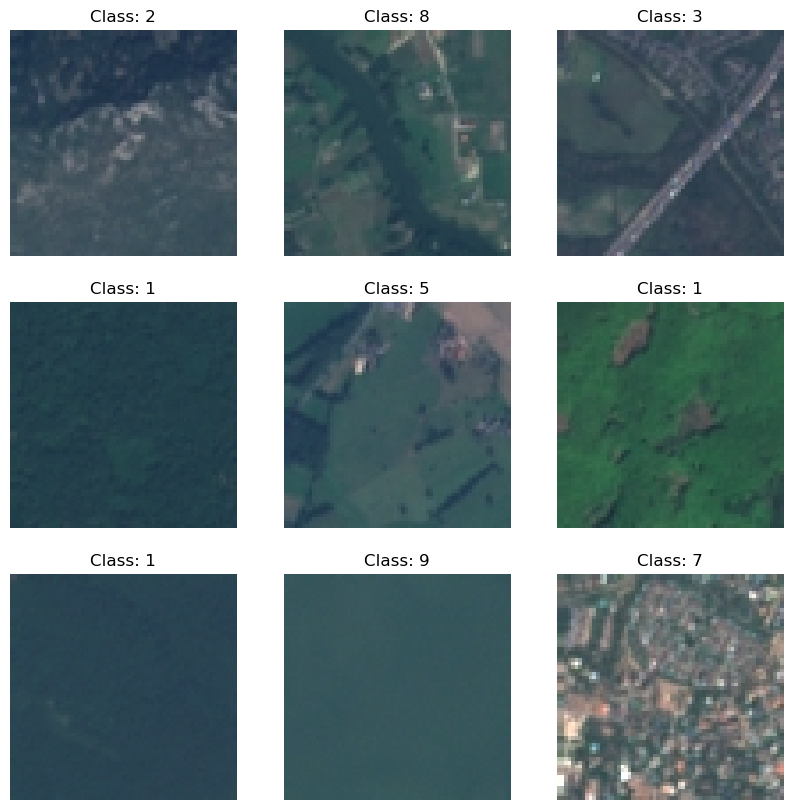

In [33]:
# Convert the dataset to an iterator
dataset_iter = iter(training_set)

# Fetch the next batch
images, class_ids = next(dataset_iter)

# Normalize images
normalized_images = images / 255.0

# Visualize the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(normalized_images[i])
    plt.title(f"Class: {class_ids[i].numpy()}")
    plt.axis("off")
plt.show()


In [35]:
normalization_layer = layers.Rescaling(rescaling_factor)
training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

In [33]:
training_set = training_set.prefetch(buffer_size=tensorflow.data.AUTOTUNE)
validation_set = validation_set.prefetch(buffer_size=tensorflow.data.AUTOTUNE)
test_set = test_set.prefetch(buffer_size=tensorflow.data.AUTOTUNE)

Code for better accuracy

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset parameters
image_width, image_height = 64, 64
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    directory=input_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    directory=input_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    directory=input_folder,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Maintain order for evaluation
)

NUM_CLASSES = len(train_generator.class_indices)
INPUT_SHAPE = (image_height, image_width, 3)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 27000 images belonging to 10 classes.


In [39]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def compile_model(input_shape, n_classes, optimizer, fine_tune=None):
    # Load the VGG16 base model
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape, pooling='avg')
    
    # Add custom layers on top of VGG16
    top_model = conv_base.output
    top_model = Dense(2048, activation='relu')(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Combine base model and custom layers
    model = Model(inputs=conv_base.input, outputs=output_layer)
    
    # Fine-tune specific layers
    if fine_tune is not None:
        for layer in conv_base.layers[:fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    return model



In [41]:
optim = Adagrad()
model = compile_model(INPUT_SHAPE, NUM_CLASSES, optim, fine_tune=None)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,785,802 (60.22 MB)

 Trainable params: 1,071,114 (4.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(
    filepath='model.weights.best.keras',  # Updated to .keras
    monitor='val_categorical_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_categorical_accuracy',
    patience=10,
    restore_best_weights=True,
    mode='max'
)

# Training parameters
N_STEPS = train_generator.samples // batch_size
N_VAL_STEPS = valid_generator.samples // batch_size
N_EPOCHS = 20

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=N_STEPS,
    epochs=N_EPOCHS,
    validation_data=valid_generator,
    validation_steps=N_VAL_STEPS,
    callbacks=[early_stop, checkpoint]
)


C:\Users\marat\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - categorical_accuracy: 0.3493 - loss: 2.0044

C:\Users\marat\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_categorical_accuracy improved from -inf to 0.49963, saving model to model.weights.best.keras
675/675 ━━━━━━━━━━━━━━━━━━━━ 360s 531ms/step - categorical_accuracy: 0.3494 - loss: 2.0041 - val_categorical_accuracy: 0.4996 - val_loss: 1.5260
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - categorical_accuracy: 0.5340 - loss: 1.4536
Epoch 2: val_categorical_accuracy improved from 0.49963 to 0.57013, saving model to model.weights.best.keras
675/675 ━━━━━━━━━━━━━━━━━━━━ 232s 343ms/step - categorical_accuracy: 0.5340 - loss: 1.4536 - val_categorical_accuracy: 0.5701 - val_loss: 1.3219
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - categorical_accuracy: 0.5945 - loss: 1.2795
Epoch 3: val_categorical_accuracy improved from 0.57013 to 0.62147, saving model to model.weights.best.keras
675/675 ━━━━━━━━━━━━━━━━━━━━ 215s 318ms/step - categorical_accuracy: 0.5946 - loss: 1.2795 - val_categorical_accuracy: 0.6215 - val_loss: 1.2160
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
print(history.history.keys())


In [58]:
# import matplotlib.pyplot as plt

# # Plot training history
# plot_history(history)

# # Load best weights
# model.load_weights('model.weights.best.hdf5')

# # Evaluate on test set
# test_loss, test_accuracy = model.evaluate(test_generator)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
def plot_history(history):
    """
    Plots the training and validation accuracy and loss over epochs.
    
    Args:
        history: A History object returned by the fit method of a Keras model.
    """
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(14, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()



In [60]:
from sklearn.metrics import classification_report

# Generate classification report
class_labels = list(class_indices.values())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


                      precision    recall  f1-score   support

          AnnualCrop       0.82      0.87      0.84      3000
              Forest       0.79      0.88      0.83      3000
HerbaceousVegetation       0.72      0.70      0.71      3000
             Highway       0.65      0.60      0.63      2500
          Industrial       0.78      0.90      0.84      2500
             Pasture       0.64      0.53      0.58      2000
       PermanentCrop       0.73      0.57      0.64      2500
         Residential       0.68      0.96      0.80      3000
               River       0.73      0.50      0.59      2500
             SeaLake       0.94      0.87      0.91      3000

            accuracy                           0.75     27000
           macro avg       0.75      0.74      0.74     27000
        weighted avg       0.75      0.75      0.75     27000



In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Generate predictions
test_generator.reset()  # Reset generator to ensure it's at the start
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices
true_classes = test_generator.classes  # True labels
class_indices = {v: k for k, v in train_generator.class_indices.items()}  # Class index mapping
class_labels = list(class_indices.values())  # Class labels

# Generate and print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()

# Print classification report
print("Classification Report:")
print(classification_report_df)

# Optional: Save classification report to a CSV file
classification_report_df.to_csv('classification_report.csv', index=True)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels))


844/844 ━━━━━━━━━━━━━━━━━━━━ 330s 391ms/step
Classification Report:
                      precision    recall  f1-score    support
AnnualCrop             0.820335  0.866000  0.842549   3000.000
Forest                 0.791942  0.878000  0.832754   3000.000
HerbaceousVegetation   0.720273  0.704667  0.712384   3000.000
Highway                0.652080  0.602000  0.626040   2500.000
Industrial             0.779162  0.900400  0.835405   2500.000
Pasture                0.640409  0.532500  0.581491   2000.000
PermanentCrop          0.729049  0.567200  0.638020   2500.000
Residential            0.680376  0.965000  0.798070   3000.000
River                  0.727800  0.501600  0.593891   2500.000
SeaLake                0.940839  0.874667  0.906547   3000.000
accuracy               0.754000  0.754000  0.754000      0.754
macro avg              0.748226  0.739203  0.736715  27000.000
weighted avg           0.754161  0.754000  0.747159  27000.000

Confusion Matrix:
                      AnnualCro

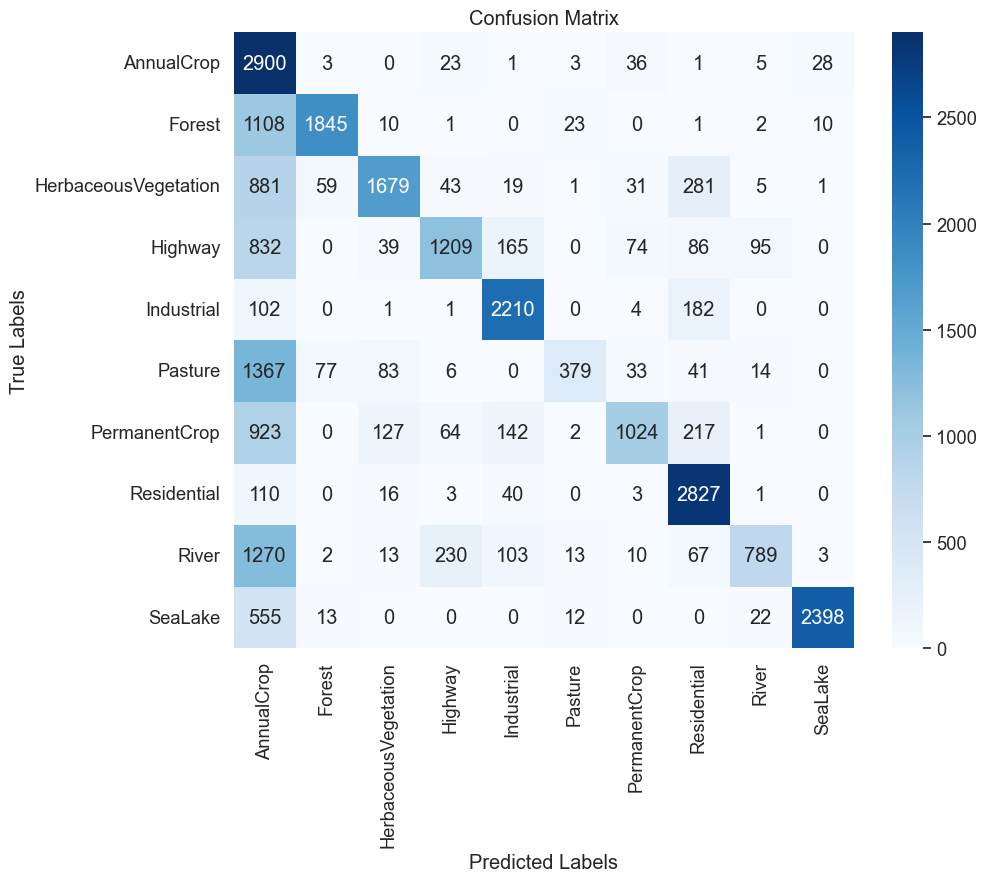

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_labels):
    """
    Plots a confusion matrix using seaborn heatmap.
    
    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        class_labels: List of class names.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(true_classes, predicted_classes, list(class_indices.values()))


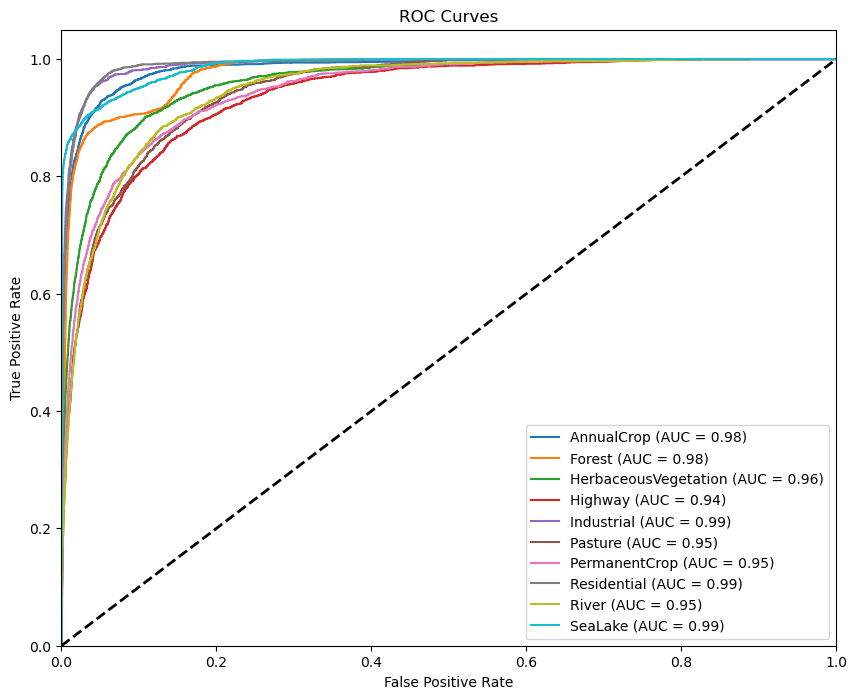

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curves(y_true, y_probs, class_labels):
    """
    Plots ROC curves for each class.
    
    Args:
        y_true: True labels (integer encoded).
        y_probs: Predicted probabilities for each class.
        class_labels: List of class names.
    """
    # Binarize the labels for multi-class ROC computation
    y_true_bin = label_binarize(y_true, classes=list(range(len(class_labels))))
    
    plt.figure(figsize=(10, 8))
    
    for i, class_label in enumerate(class_labels):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves
plot_roc_curves(true_classes, predictions, list(class_indices.values()))


In [69]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(train_generator, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(valid_generator, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 71.91%
Validation Accuracy: 71.44%
Test Accuracy: 75.40%


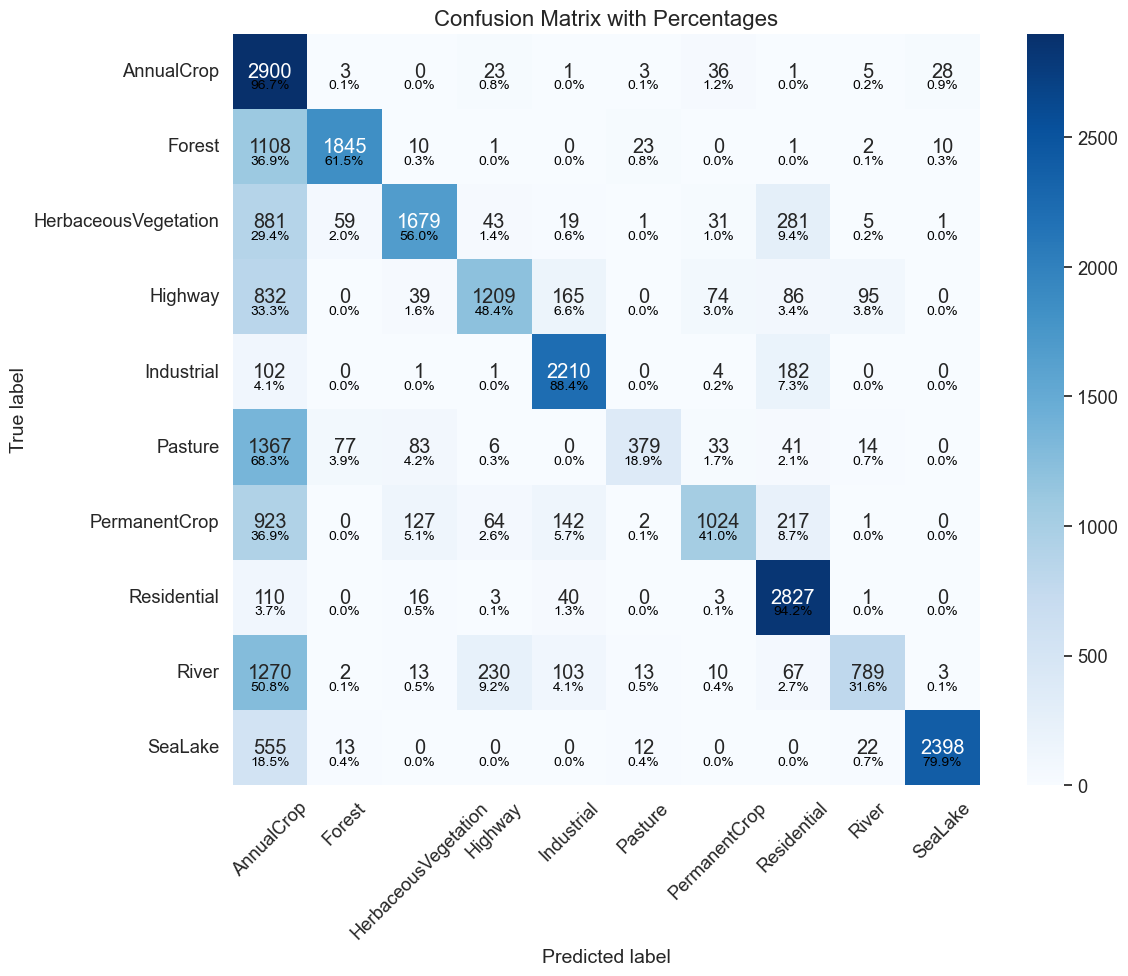

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix_with_percentages(y_true, y_pred, class_labels):
    """
    Plots a confusion matrix with both raw counts and percentages using seaborn heatmap.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        class_labels: List of class names.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix by row (true labels) to get percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=True)
    
    # Annotate percentages in each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.6, f'\n{cm_percent[i, j]:.1f}%',
                     ha='center', va='center', color='black', fontsize=10)
    
    # Add axis labels and title
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.title('Confusion Matrix with Percentages', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage:
plot_confusion_matrix_with_percentages(true_classes, predicted_classes, list(class_indices.values()))


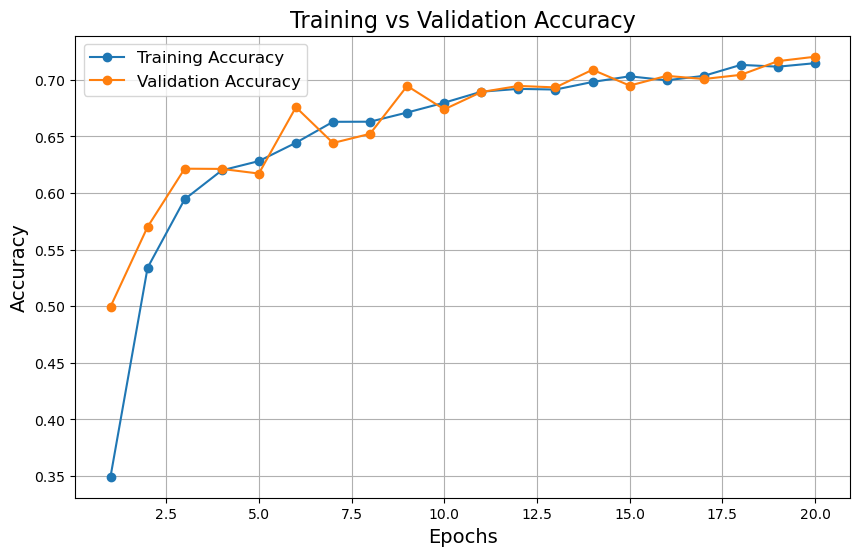

In [73]:
import matplotlib.pyplot as plt

# Training and validation accuracy values (extracted from logs)
epochs = list(range(1, 21))  # 20 epochs
training_accuracy = [
    0.3494, 0.5340, 0.5945, 0.6200, 0.6282, 0.6444, 0.6629, 0.6630, 0.6711, 0.6798, 
    0.6895, 0.6920, 0.6914, 0.6981, 0.7031, 0.6996, 0.7035, 0.7132, 0.7116, 0.7147
]
validation_accuracy = [
    0.4996, 0.5701, 0.6215, 0.6213, 0.6172, 0.6758, 0.6442, 0.6523, 0.6946, 0.6739,
    0.6892, 0.6946, 0.6933, 0.7089, 0.6949, 0.7035, 0.7007, 0.7044, 0.7165, 0.7204
]

# Plotting training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')

# Adding labels, title, and legend
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training vs Validation Accuracy', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


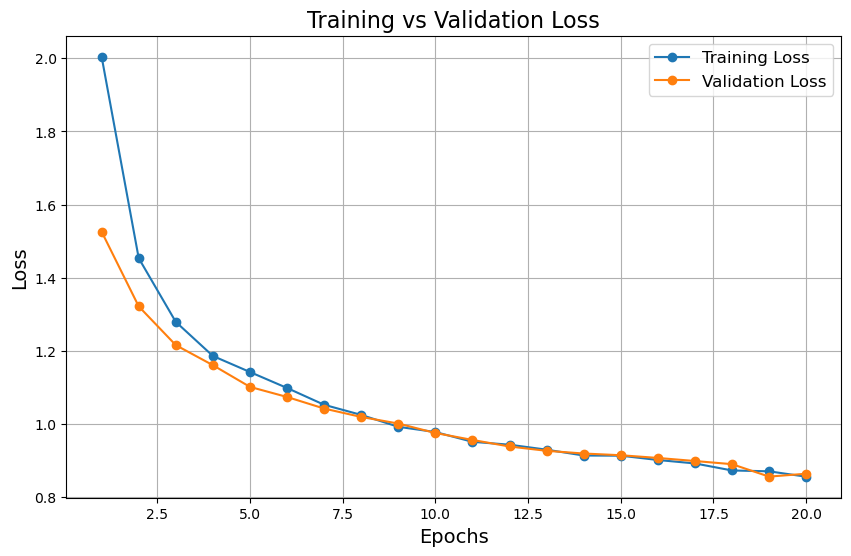

In [75]:
# Training and validation loss values (extracted from logs)
training_loss = [
    2.0041, 1.4536, 1.2795, 1.1864, 1.1425, 1.0989, 1.0530, 1.0253, 0.9928, 0.9785, 
    0.9518, 0.9439, 0.9303, 0.9143, 0.9139, 0.9021, 0.8927, 0.8735, 0.8712, 0.8564
]
validation_loss = [
    1.5260, 1.3219, 1.2160, 1.1612, 1.1019, 1.0743, 1.0427, 1.0197, 1.0017, 0.9759, 
    0.9569, 0.9390, 0.9272, 0.9198, 0.9151, 0.9077, 0.8993, 0.8907, 0.8567, 0.8646
]

# Plotting training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')

# Adding labels, title, and legend
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training vs Validation Loss', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()